In [1]:
#Linear Regression

In [2]:
import matplotlib.pyplot as plt   # For visualization
import tensorflow as tf           # For Machine Learning
import xlrd                       # For data reading
import numpy as np                # For mathematical operations

In [3]:
#To display plots within notebook
%matplotlib inline                

In [4]:
#Store data path in a variable
DATA_FILE = '/home/aeros/Documents/Datasets/Fire-Theft.xls'

In [5]:
#Step 1: Reading data from the .xls file
book = xlrd.open_workbook(DATA_FILE, encoding_override = 'utf-8')
sheet = book.sheet_by_index(0)
train_data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows-10)])
test_data = np.asarray([sheet.row_values(i) for i in range(sheet.nrows-10, sheet.nrows)])
print(len(train_data), len(test_data))
n_samples = len(train_data)

32 10


In [6]:
#Step 2: Create placeholders for X(number of fire) and Y(number of theft)
X = tf.placeholder(dtype = tf.float32, name = 'X')
Y = tf.placeholder(dtype = tf.float32, name = 'Y')

In [7]:
#Step 3: Create w(weights) and b(biases) initalized to 0
w = tf.Variable(0.0, name = 'weights')
b = tf.Variable(0.0, name = 'biases')

In [8]:
#Step 4: Get prediction for Y
Y_predicted = X*w + b

In [9]:
#Step 5: Use the squared error as the loss function
loss = tf.square(Y - Y_predicted, name = 'loss')
loss_sum = 0.0 #loss_per_epoch

In [10]:
# A counter to keep track of number of times the updates happened
global_step = tf.Variable(0.0, name = 'global_step')

In [11]:
#Step 6: Using Gradient Descent Optimizer with learning_rate = 0.001 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001).minimize(loss, global_step = global_step)

There are several other optimizers. Each of them have a different or quite similar update strategies.
- tf.train.AdadeltaOptimizer
- tf.train.AdagradOptimizer
- tf.train.AdagradDAOptimizer
- tf.train.MomentumOptimizer
- tf.train.AdamOptimizer
- tf.train.FtrlOptimizer
- tf.train.ProximalGradientDescentOptimizer
- tf.train.ProximalAdagradOptimizer
- tf.train.RMSPropOptimizer

In [12]:
#Step 7: Training part
with tf.Session() as sess:
    #initialie the variables
    sess.run(tf.global_variables_initializer())    #Initializes all variables defined above
    saver = tf.train.Saver()                       #returns an object with methods to save and restore models
    #train for 100 epochs
    for i in range(100):
        for x,y in train_data:
            opt, loss_value = sess.run([optimizer, loss], feed_dict = {X:x,Y:y})
            loss_sum += loss_value
        average_loss = loss_sum/n_samples
        print("Average loss over epoch {} = ".format(i), average_loss)
        loss_sum = 0.0
        if (i + 1)%10 == 0:
            # Saving model on checkpoints at every 10th epoch
            save_path = saver.save(sess, "/home/aeros/models/model.ckpt", global_step = (i+1)) 
    print("Model saved in file: %s" % save_path)
    w_value, b_value = sess.run([w,b])
    print(w_value, b_value,'\n')
    
    #Print global_step to view number of times updates too place
    print('global_step = ',global_step.eval())
    
    #test model
    for x,y in test_data:
        opt, loss_value = sess.run([optimizer, loss], feed_dict = {X:x, Y:y})
        print('Loss on each prediction: ',loss_value)

Average loss over epoch 0 =  2588.17993141
Average loss over epoch 1 =  2588.54694986
Average loss over epoch 2 =  2570.07521176
Average loss over epoch 3 =  2552.12037992
Average loss over epoch 4 =  2534.66433781
Average loss over epoch 5 =  2517.69169891
Average loss over epoch 6 =  2501.18877876
Average loss over epoch 7 =  2485.14075691
Average loss over epoch 8 =  2469.53236589
Average loss over epoch 9 =  2454.35182986
Average loss over epoch 10 =  2439.58411276
Average loss over epoch 11 =  2425.21765853
Average loss over epoch 12 =  2411.24064244
Average loss over epoch 13 =  2397.6409906
Average loss over epoch 14 =  2384.40636061
Average loss over epoch 15 =  2371.52683056
Average loss over epoch 16 =  2358.99164003
Average loss over epoch 17 =  2346.78997061
Average loss over epoch 18 =  2334.91213975
Average loss over epoch 19 =  2323.34931738
Average loss over epoch 20 =  2312.091158
Average loss over epoch 21 =  2301.12944653
Average loss over epoch 22 =  2290.45455142
A

Not close to say a decent result. A primary reason is that the size of the dataset is too small. The linear model just might not be able to fit the complexities within the data. 

In [14]:
#Data preparation for visualization
Y_train = [train_data[i][1] for i in range(len(train_data))]
X_train = [train_data[i][0] for i in range(len(train_data))]
Y_predicted = [(X_train[i]*w_value + b_value) for i in range(len(train_data))]  
#w_value and b_value are final weights and biases obtained

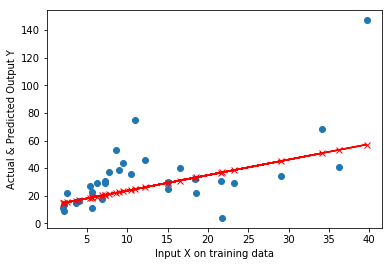

In [15]:
plt.scatter(X_train, Y_train)        #training data represented by blue dots
# plt.scatter(X,Y_predicted, '-xr') 
plt.plot(X_train,Y_predicted,'-xr')  #predicted data from the computed weights and biases
plt.xlabel('Input X on training data')
plt.ylabel('Actual & Predicted Output Y')
plt.show()

In [ ]:
#To restore a saved model
saver = tf.train.Saver()
with tf.session() as sess:
    save.restore(sess, model_name)

In [16]:
#Using Quadratic loss Function on the same dataset
X = tf.placeholder(dtype = tf.float32, name = 'X')
Y = tf.placeholder(dtype = tf.float32, name = 'Y')
#Define new weights
w = tf.Variable(0.0, name = 'weights_1')
u = tf.Variable(0.0, name = 'weights_2')
b = tf.Variable(0.0, name = 'biases')

#Get prediction for Y
Y_predicted = X*X*w + X*u + b
#Use squared error as the loss function
loss = tf.square(Y - Y_predicted, name = 'loss')
# Define variable to store loss per epoch
loss_value = tf.Variable(0.0, name = 'loss_value')
#Loss_per_epoch
loss_sum = 0
#Use Gradient Descent Optimizer with learning rate = 0.000001 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.000001).minimize(loss)



If in this case the learning rate is kept as 0.001, the learning rate will be too high providing too much energy to the system and the loss would just keep overshooting until the program returns NaN.

In [17]:
with tf.Session() as sess:
    #Initalize variables w,u,b
    sess.run(tf.global_variables_initializer())
    #train for 100 epoch
    for i in range(100):
        for x,y in train_data:
            opt, loss_value = sess.run([optimizer, loss], feed_dict = {X:x,Y:y})
            loss_sum += loss_value
        average_loss = loss_sum/n_samples
        print("Average loss over epoch {} = ".format(i), average_loss)
        loss_sum = 0.0
        
    w_value, u_value, b_value = sess.run([w,u,b])
    print('Weights and Biases calculated')
    print(w_value,u_value,b_value, '\n')

    #test model
    for x,y in test_data:
        opt, loss_value = sess.run([optimizer, loss], feed_dict = {X:x, Y:y})
        print('Loss on each predcition: ',loss_value)

Average loss over epoch 0 =  4397.43900886
Average loss over epoch 1 =  11480.2467901
Average loss over epoch 2 =  14864.3845728
Average loss over epoch 3 =  16104.1164736
Average loss over epoch 4 =  16591.7946845
Average loss over epoch 5 =  16840.5555564
Average loss over epoch 6 =  17015.9976773
Average loss over epoch 7 =  17169.7444326
Average loss over epoch 8 =  17317.691047
Average loss over epoch 9 =  17464.765422
Average loss over epoch 10 =  17612.484767
Average loss over epoch 11 =  17761.3279791
Average loss over epoch 12 =  17911.4405195
Average loss over epoch 13 =  18062.8690277
Average loss over epoch 14 =  18215.6543147
Average loss over epoch 15 =  18369.8017381
Average loss over epoch 16 =  18525.3305898
Average loss over epoch 17 =  18682.2440445
Average loss over epoch 18 =  18840.5768309
Average loss over epoch 19 =  19000.3197728
Average loss over epoch 20 =  19161.5021464
Average loss over epoch 21 =  19324.1295164
Average loss over epoch 22 =  19488.2152311
A

In [18]:
#Data Preparation for visualization
Y_train = [train_data[i][1] for i in range(len(train_data))]
X_train = [train_data[i][0] for i in range(len(train_data))]
Y_predicted = [(X_train[i]*X_train[i]*w_value + X_train[i]*u_value + b_value) for i in range(len(train_data))]

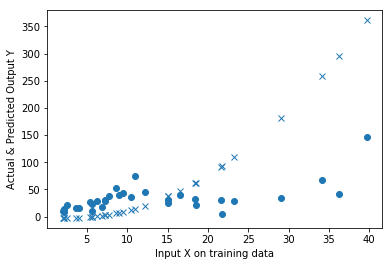

In [19]:
plt.scatter(X_train, Y_train)        #training data represented by blue dots
# plt.scatter(X,Y_predicted, '-xr') 
plt.plot(X_train,Y_predicted,'x')  #predicted data from the computed weights and biases
plt.xlabel('Input X on training data')
plt.ylabel('Actual & Predicted Output Y')
plt.show()

This takes less time to converge than the linear function, but still completely off due to the several outliers on the right. It probably does better with Huber loss instead of MSE or a 3rd degree polynomial as the function f.
Using Huber loss for quadratic model, I got something that’s slightly better at ignoring the
outliers

### Huber Loss (Wikipedia)

![](huber_loss.png)

In [20]:
#Using Quadratic loss Function with huber loss
X = tf.placeholder(dtype = tf.float32, name = 'X')
Y = tf.placeholder(dtype = tf.float32, name = 'Y')
#Define new weights
w = tf.Variable(0.0, name = 'weights_1')
u = tf.Variable(0.0, name = 'weights_2')
b = tf.Variable(0.0, name = 'biases')

#Get prediction for Y
Y_predicted = X*X*w + X*u + b
#Use root-squared error as the loss function
loss = tf.losses.huber_loss(Y, Y_predicted)
# Define variable to store loss per epoch
loss_value = tf.Variable(0.0, name = 'loss_value')
#Loss_per_epoch
loss_sum = 0
#Use Gradient Descent Optimizer with learning rate = 0.0001 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.0001).minimize(loss)
# With huber loss we can run the the model with that high of a learning rate

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(100):
        for x,y in train_data:
            opt, loss_value = sess.run([optimizer, loss], feed_dict = {X:x, Y:y})
            loss_sum += loss_value
        average_loss = loss_sum/n_samples
        print("Average loss over epoch {} = ".format(i), average_loss)
        loss_sum = 0.0
    w_value, u_value, b_value = sess.run([w,u,b])
    print('Weights and Biases calculated')
    print(w.eval(), u.eval(), b.eval(), '\n')  #var.eval() lets you access the value of a variable
    


    
    #test model
    for x,y in test_data:
        opt, loss_value = sess.run([optimizer, loss], feed_dict = {X:x, Y:y})
        print('Loss on each prediction: ',loss_value)

Average loss over epoch 0 =  32.898601383
Average loss over epoch 1 =  31.4343351317
Average loss over epoch 2 =  33.8910874128
Average loss over epoch 3 =  32.0054972768
Average loss over epoch 4 =  33.6729296744
Average loss over epoch 5 =  32.0596528053
Average loss over epoch 6 =  33.2002156079
Average loss over epoch 7 =  31.8916163445
Average loss over epoch 8 =  33.499581933
Average loss over epoch 9 =  31.9457718879
Average loss over epoch 10 =  31.1366345241
Average loss over epoch 11 =  31.7910303473
Average loss over epoch 12 =  33.0768355278
Average loss over epoch 13 =  30.7172654005
Average loss over epoch 14 =  30.6990708858
Average loss over epoch 15 =  30.6758992523
Average loss over epoch 16 =  30.6527273655
Average loss over epoch 17 =  30.6295567155
Average loss over epoch 18 =  30.6063846052
Average loss over epoch 19 =  30.912849889
Average loss over epoch 20 =  30.5593642294
Average loss over epoch 21 =  30.5361924022
Average loss over epoch 22 =  30.5130210519
A

In [21]:
#Data Preparation for visualization
Y_train = [train_data[i][1] for i in range(len(train_data))]
X_train = [train_data[i][0] for i in range(len(train_data))]
Y_predicted = [(X_train[i]*X_train[i]*w_value + X_train[i]*u_value + b_value) for i in range(len(train_data))]

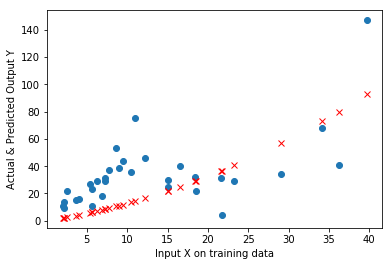

In [22]:
plt.scatter(X_train, Y_train)        #training data represented by blue dots
plt.plot(X_train,Y_predicted,'xr')  #predicted data from the computed weights and biases
plt.xlabel('Input X on training data')
plt.ylabel('Actual & Predicted Output Y')
plt.show()

We can also use tensorboard for visualization of our model in graph.
After running the code, type into terminal> tensorboard --logidir = 'enter the graph path'

After,

tf.Session() as sess:
    #Create a writer object
    writer = tf.summary.FileWriter('graph path', sess.graph)
    
    
    
    '''After training and testing code'''
    
writer.close()

![](gradient_graph.png)